In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [156]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
train_data.size

10692

In [159]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
def boxplot(column_name):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=train_data[column_name], fliersize=1)
    plt.title(f'{column_name} boxplot')

In [162]:
def histogram_gen(column_name, median_text=True, **kwargs):
    plt.figure(figsize=(5,3))
    median=round(train_data[column_name].median(), 1)
    ax = sns.histplot(x=train_data[column_name], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
        ha='left', va='top', transform=ax.transAxes)
    else:
         print('Median:', median)
    plt.title(f'{column_name} histogram');

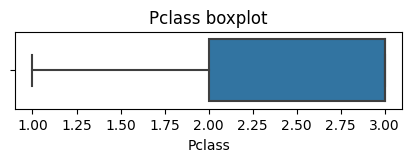

In [163]:
boxplot('Pclass')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


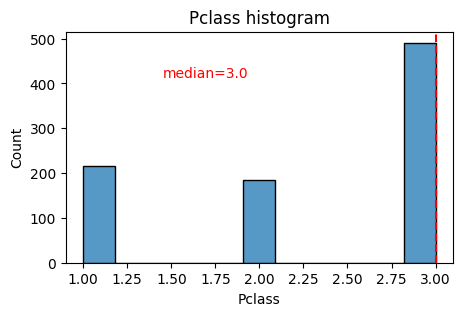

In [164]:
histogram_gen('Pclass')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


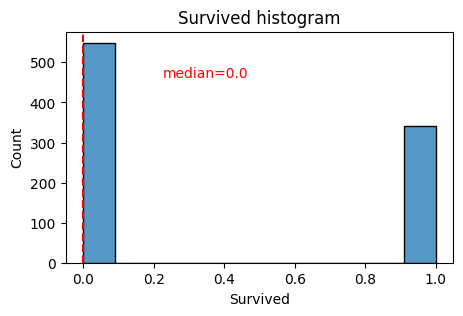

In [165]:
histogram_gen('Survived')

Text(0.5, 1.0, 'Survived vs. did not survived')

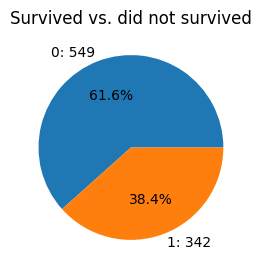

In [166]:
fig = plt.figure(figsize=(3,3))
data=train_data['Survived'].value_counts()
plt.pie(data, 
       labels=[
           f'{data.index[0]}: {data.values[0]}',
           f'{data.index[1]}: {data.values[1]}'
       ],
       autopct='%1.1f%%')
plt.title('Survived vs. did not survived')

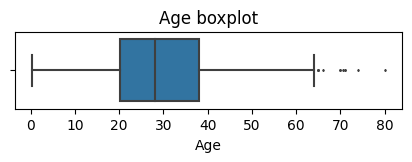

In [167]:
boxplot('Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 28.0


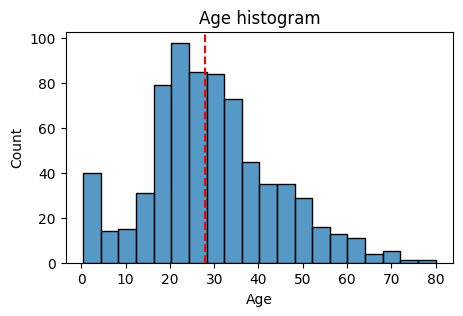

In [168]:
histogram_gen('Age', False)

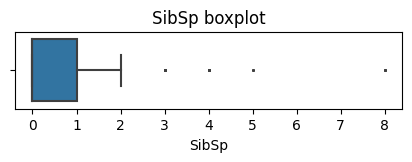

In [169]:
boxplot('SibSp')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


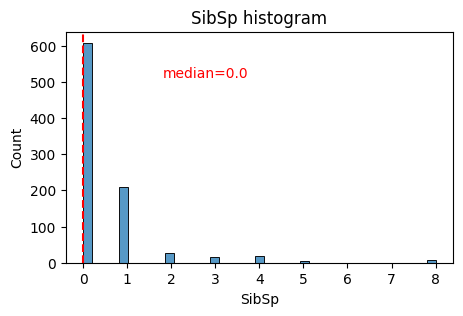

In [170]:
histogram_gen('SibSp')

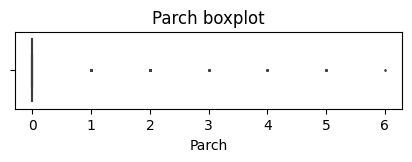

In [171]:
boxplot('Parch')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


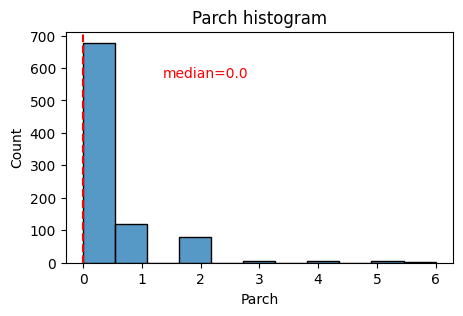

In [172]:
histogram_gen('Parch')

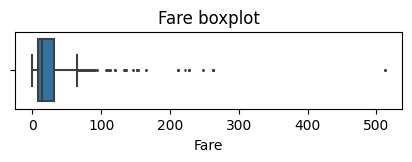

In [173]:
boxplot('Fare')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


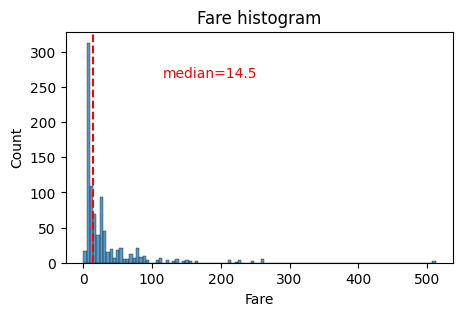

In [174]:
histogram_gen('Fare')

Text(0.5, 1.0, 'male vs. female')

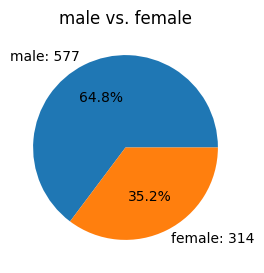

In [175]:
fig = plt.figure(figsize=(3,3))
data=train_data['Sex'].value_counts()
plt.pie(data, 
       labels=[
           f'{data.index[0]}: {data.values[0]}',
           f'{data.index[1]}: {data.values[1]}'
       ],
       autopct='%1.1f%%')
plt.title('male vs. female')

In [176]:
def comparison_hist_gen(_x, _hue, _multiple, _title):
    plt.figure(figsize=(8,4))
    histplot = sns.histplot(data=train_data,
                x=_x,
                hue=_hue,
               # shrink=0.9,
                multiple=_multiple)
    # Adding value counts to each bar
    for patch in histplot.patches:
        height = patch.get_height()
        if height > 0:  # Only annotate bars with a positive height
            plt.annotate(
                format(height, '.0f'),  # Format the height to an integer
                (patch.get_x() + patch.get_width() / 2., height),  # (x, y) position for the annotation
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 5),  # Offset text position above the bar
                textcoords='offset points'  # Offset in points
            )

    plt.title(_title)

### survived vs. pclass

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

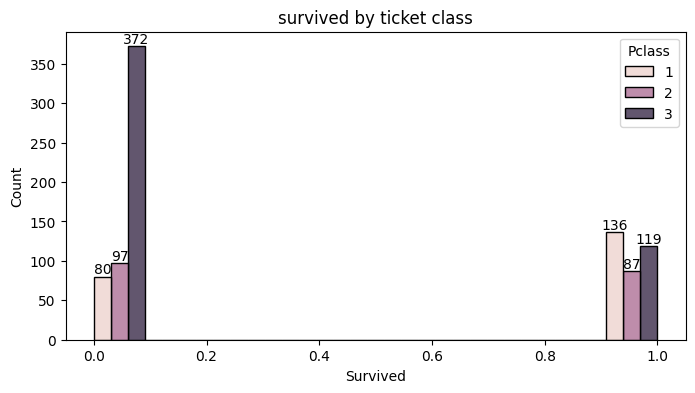

In [177]:
comparison_hist_gen('Survived', 'Pclass', 'dodge', 'survived by ticket class')

In [178]:
pclass = train_data.loc[train_data.Pclass == 3]["Survived"]
pclass = sum(pclass)/len(pclass)

print("% of class 3 ticket holders who survived:", pclass)

pclass = train_data.loc[train_data.Pclass == 2]["Survived"]
pclass = sum(pclass)/len(pclass)

print("% of class 2 ticket holders who survived:", pclass)

pclass = train_data.loc[train_data.Pclass == 1]["Survived"]
pclass = sum(pclass)/len(pclass)

print("% of class 1 ticket holders who survived:", pclass)


% of class 3 ticket holders who survived: 0.24236252545824846
% of class 2 ticket holders who survived: 0.47282608695652173
% of class 1 ticket holders who survived: 0.6296296296296297


#### survived vs. gender 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

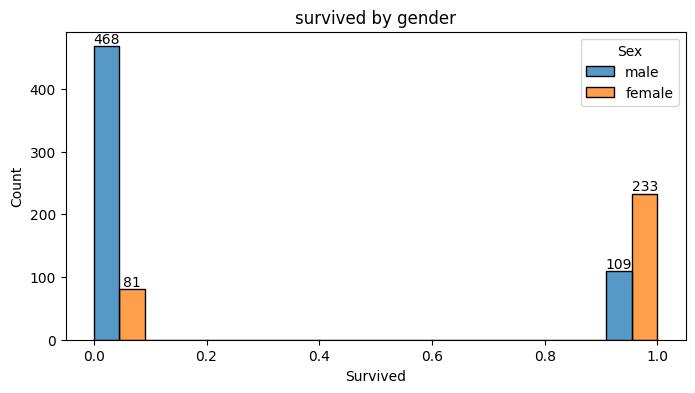

In [179]:
comparison_hist_gen('Survived', 'Sex', 'dodge', 'survived by gender')

In [180]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

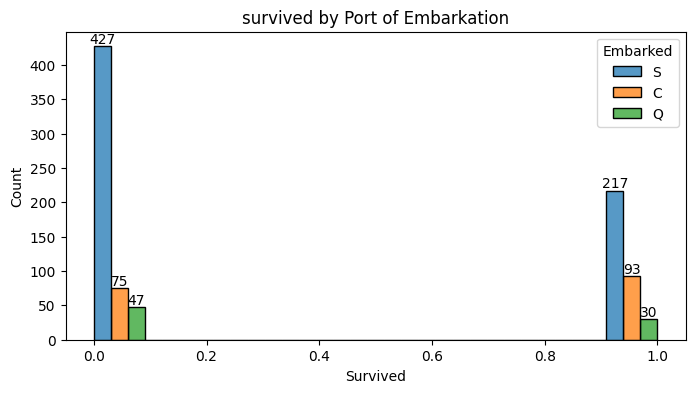

In [181]:
comparison_hist_gen('Survived', 'Embarked', 'dodge', 'survived by Port of Embarkation')

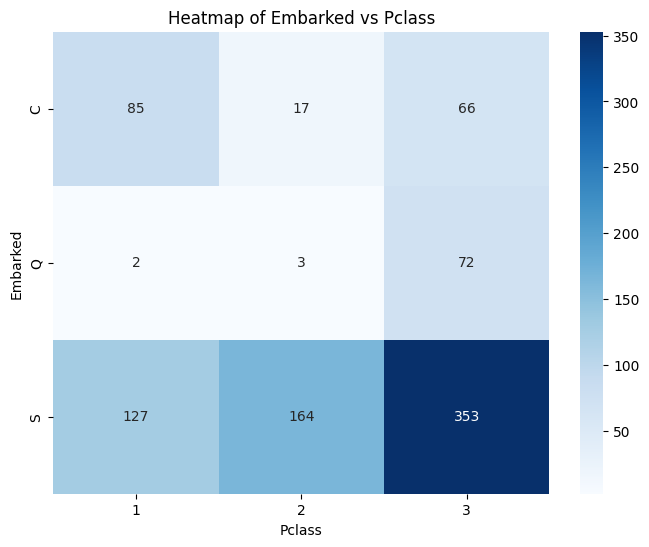

In [182]:
contingency_table = pd.crosstab(train_data['Embarked'], train_data['Pclass'])

plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Embarked vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Embarked')
plt.show()

In [183]:
embarked = train_data.loc[train_data.Embarked == 'C']["Survived"]
embarked = sum(embarked)/len(embarked)

print("% of people embarked from port C who survived:", embarked)

embarked = train_data.loc[train_data.Embarked == 'S']["Survived"]
embarked = sum(embarked)/len(embarked)

print("% of people embarked from port S who survived:", embarked)

embarked = train_data.loc[train_data.Embarked == 'Q']["Survived"]
embarked = sum(embarked)/len(embarked)

print("% of people embarked from port Q who survived:", embarked)

% of people embarked from port C who survived: 0.5535714285714286
% of people embarked from port S who survived: 0.33695652173913043
% of people embarked from port Q who survived: 0.38961038961038963


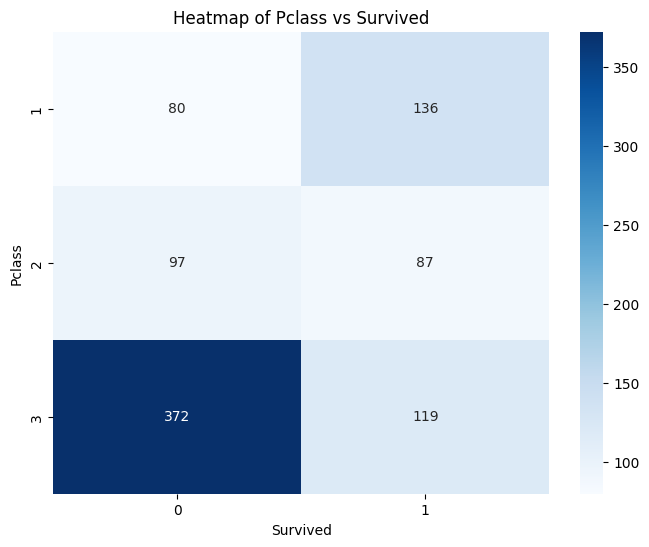

In [184]:
contingency_table = pd.crosstab(train_data['Pclass'], train_data['Survived'])

plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Pclass vs Survived')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()

In [185]:
parch = train_data.loc[train_data.Parch == 0]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 0 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 1]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 1 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 2]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 2 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 3]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 3 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 4]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 4 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 5]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 5 parents / children aboard the Titanic who survived:", parch)

parch = train_data.loc[train_data.Parch == 6]["Survived"]
parch = sum(parch)/len(parch)

print("% of people with 6 parents / children aboard the Titanic who survived:", parch)

% of people with 0 parents / children aboard the Titanic who survived: 0.34365781710914456
% of people with 1 parents / children aboard the Titanic who survived: 0.5508474576271186
% of people with 2 parents / children aboard the Titanic who survived: 0.5
% of people with 3 parents / children aboard the Titanic who survived: 0.6
% of people with 4 parents / children aboard the Titanic who survived: 0.0
% of people with 5 parents / children aboard the Titanic who survived: 0.2
% of people with 6 parents / children aboard the Titanic who survived: 0.0


In [186]:
sibsp = train_data.loc[train_data.SibSp == 0]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 0 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 1]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 1 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 2]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 2 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 3]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 3 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 4]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 4 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 5]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 5 siblings / spouses aboard the Titanic who survived:", sibsp)

sibsp = train_data.loc[train_data.SibSp == 8]["Survived"]
sibsp = sum(sibsp)/len(sibsp)

print("% of people with 8 siblings / spouses aboard the Titanic who survived:", sibsp)

% of people with 0 siblings / spouses aboard the Titanic who survived: 0.34539473684210525
% of people with 1 siblings / spouses aboard the Titanic who survived: 0.5358851674641149
% of people with 2 siblings / spouses aboard the Titanic who survived: 0.4642857142857143
% of people with 3 siblings / spouses aboard the Titanic who survived: 0.25
% of people with 4 siblings / spouses aboard the Titanic who survived: 0.16666666666666666
% of people with 5 siblings / spouses aboard the Titanic who survived: 0.0
% of people with 8 siblings / spouses aboard the Titanic who survived: 0.0


In [187]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [188]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [189]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [190]:
#Cabin column has too many missing values
train_data.drop(['Cabin'], axis=1, inplace=True)

In [191]:
train_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [192]:
train_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

### Insights

* 61.6% did not survive survive in titanic
* Most people are travelling from 3rd class
* Most people embarked from port S
* Most people age range vary from 20-40 and very few people are above 65
* Most people are travelling with no sibiling and spouse
* most people have no parent/children
* some outliers are present in fare with only one ticket having price of 512 (maximum in the training dataset)
* 64.8% of the traveles are men
* 74.2% of the women survived and only 18.89% of men survived
* 24.23% of class 3 ticket holders survived
* 47.28% of class 2 ticket holders survived
* 62.96% of class 1 ticket holders survived
* 55.35% of people who embarked from port C survived
* 33.69% of people who embarked from port S survived
* 38.96% of people who embarked from port Q survived
* thos with 1-3 parents/children have a higher chance of surviving
* those with 1 sibling/spouse have a higher chance of surviving

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

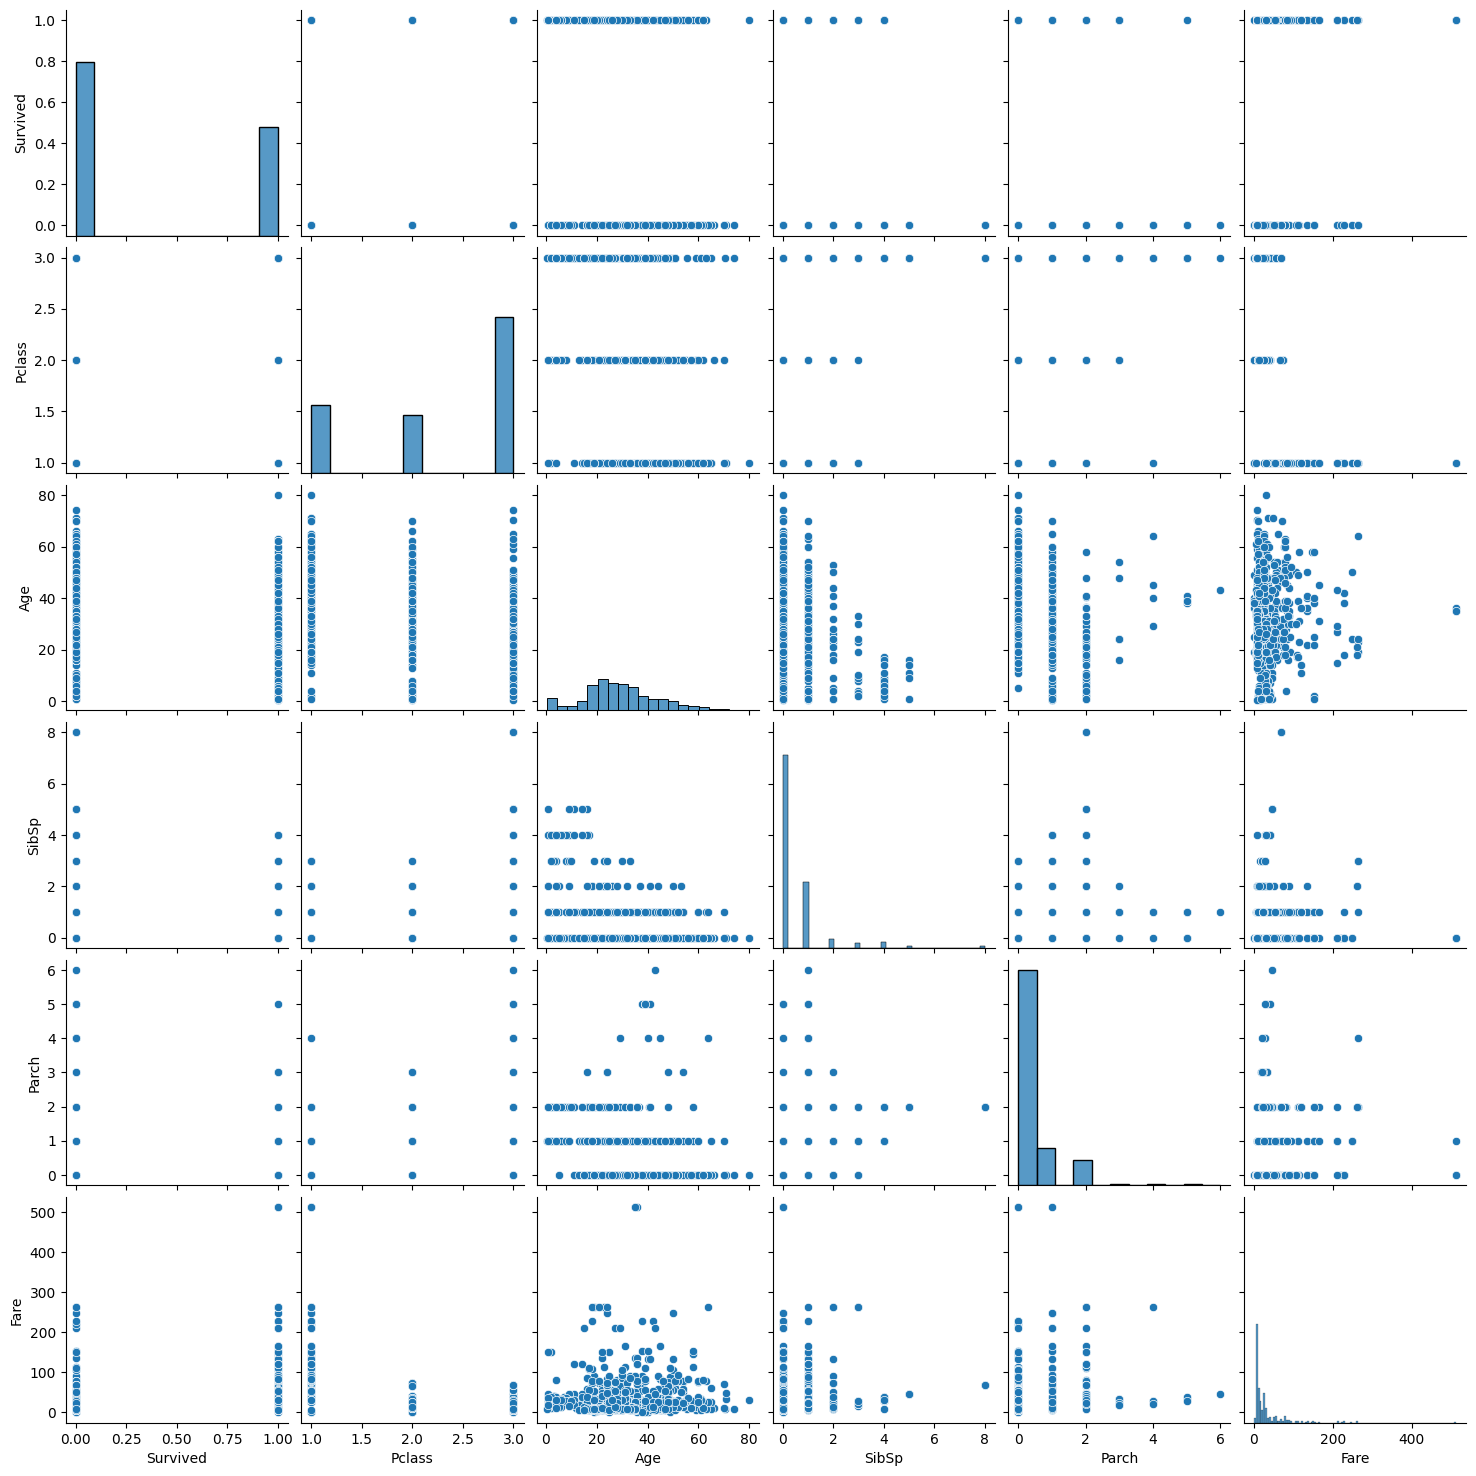

In [193]:
sns.pairplot(train_data)
plt.show()

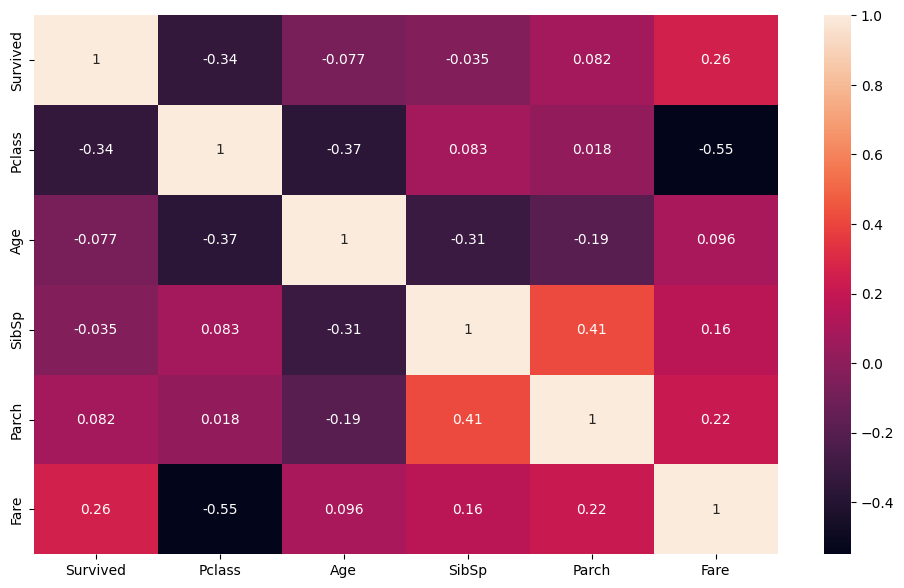

In [194]:
#Multivariate analysis
plt.figure(figsize=(12,7))
sns.heatmap(train_data.select_dtypes(exclude=['object']).corr(), annot=True)
plt.show()

### splitting the training data into training and validation

* imputing the missing values should be done **after** splitting the training data into training and validation.
* this avoides: 
    * **data leakage**: imputing before splitting means the information from the validation set might influence the imputed values in the training set. -> Overestimation of the model's performance
    * **Unrealistic evaluation**: the model should be evaluated on how well it handles unseen data

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

### handling missing values

In [197]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

* Note: we have already dropped column Cabin since ~77% of the values are missing

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

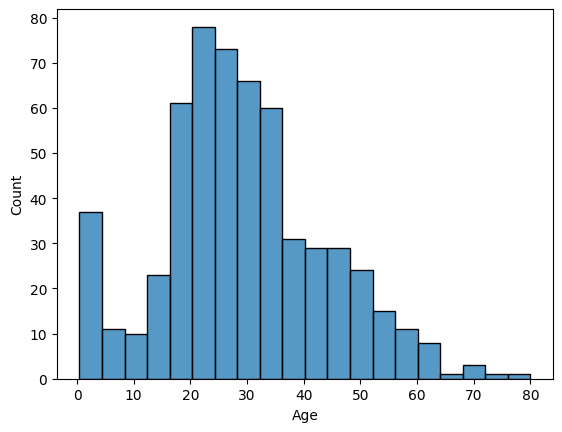

In [198]:
## first we need to handle Age column
sns.histplot(train_data.Age)

* Since the variable is almost normaly distributed, we can impute the missing values with the mean.
* some can argue that the distribution is a little bit skewed, in that case we can use the median value.
* In our case, we will impute using the median value. the data is a little bit skewed and we have few outliers

In [199]:
median = train_data['Age'].median()
median

28.0

In [200]:
train_data['Age'].fillna(value=median, inplace=True)
val_data['Age'].fillna(value=median, inplace=True)

/tmp/ipykernel_24/1722856981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(value=median, inplace=True)
/tmp/ipykernel_24/1722856981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

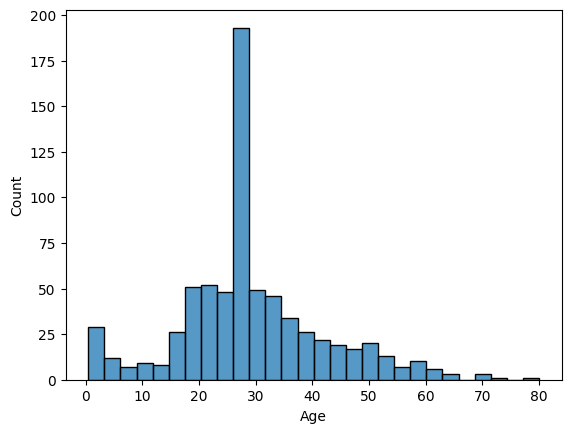

In [201]:
# check histogram after imputation
sns.histplot(train_data.Age)

In [202]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [203]:
val_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

* Note: since Embarked column has only 2 missing values, we can drop the corresponsing rows 

In [204]:
train_data.dropna(subset=['Embarked'], inplace=True)

In [205]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### feature engineering

# Encoding for categorical variables and scaling\normalizing for numerical variables

In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  710 non-null    int64  
 1   Pclass    710 non-null    int64  
 2   Sex       710 non-null    object 
 3   Age       710 non-null    float64
 4   SibSp     710 non-null    int64  
 5   Parch     710 non-null    int64  
 6   Fare      710 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


### check which numerical variables to normalize and which to standardize

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

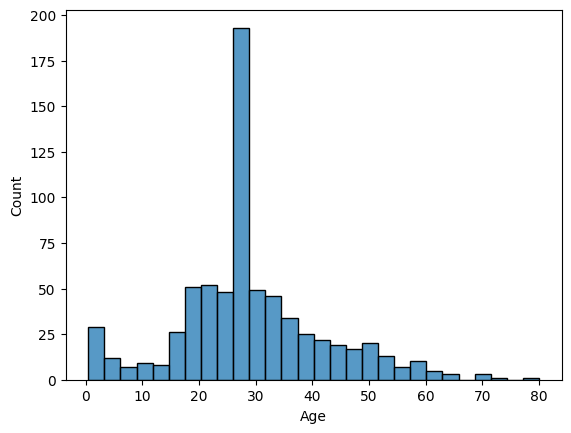

In [207]:
sns.histplot(train_data.Age)

* **Age** variable follows the nomal bell shaped distribution. -> **Standardize** (mean=0, std=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pclass', ylabel='Count'>

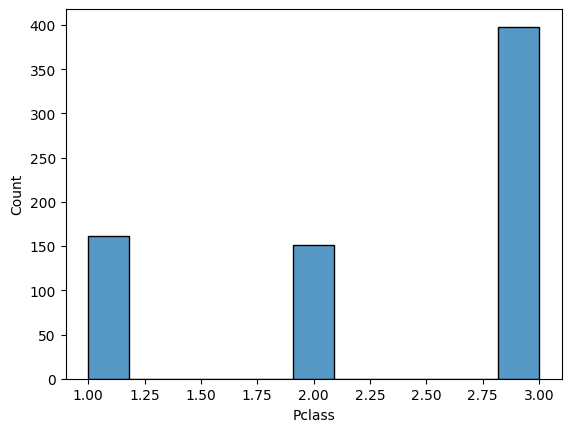

In [208]:
sns.histplot(train_data.Pclass)

* **Pclass** variable is not normally distributed, it is actually more like a categorical variable disguised as a numerical variable -> **Normalize** - scale between 0 and 1

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SibSp', ylabel='Count'>

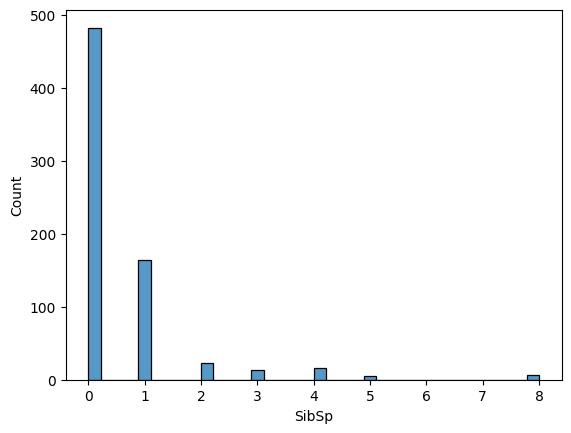

In [209]:
sns.histplot(train_data.SibSp)

* **SibSp** -> **Normalize**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parch', ylabel='Count'>

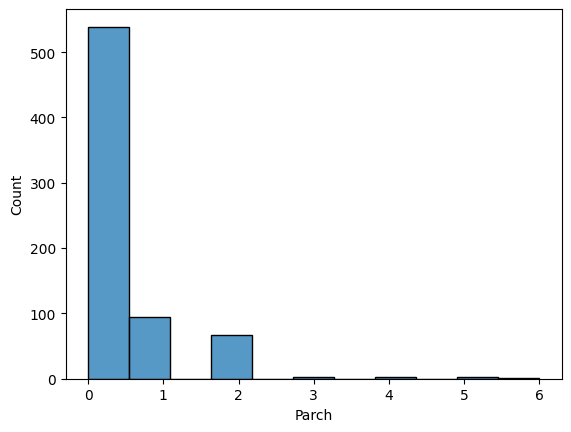

In [210]:
sns.histplot(train_data.Parch)

* **Parch** -> **Normalize**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

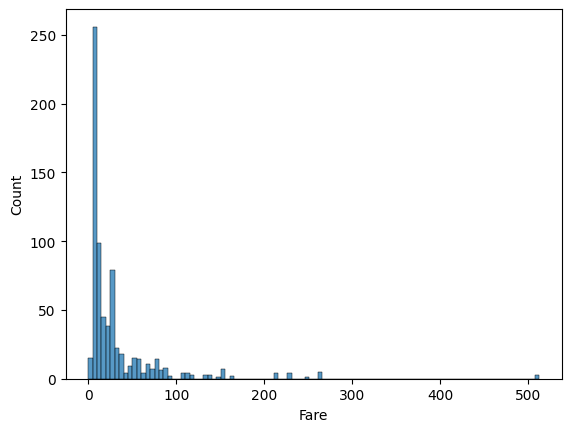

In [211]:
sns.histplot(train_data.Fare)

* **Fare** -> distribution is not bill shaped,  **Normalize** 

#### Numerical variables transformation plan summary:

* Standarize:
    * Age
    
* Normalize:
    * Pclass
    * SibSp
    * Parch
    * Fare

## Encoding the categorical variables
* Sex - **One-hot encoding**, preserves the categorical nature of the data, avoids imposing an accidental order. We want to explicitly capture the difference between "female" and "male", since females have a higher chance of survival, therefore one-hot encoding seems like a better fit.
* Embarked - **One-hot encoding**, similar explanation as above.

In [212]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [213]:
def preprocess_data(data):
    X = data

    numerical_to_standarize = ['Age']
    numerical_to_normalize = ['Pclass', 'SibSp', 'Parch', 'Fare']

    #standarize
    scaler = StandardScaler() 
    X[numerical_to_standarize] = scaler.fit_transform(X[numerical_to_standarize])

    #normalize
    scaler = MinMaxScaler(feature_range=(0, 1))
    X[numerical_to_normalize] = scaler.fit_transform(X[numerical_to_normalize])

    '''OneHotEncoder from SciKit library only takes numerical categorical values, 
    hence any value of string type should be label encoded before one hot encoded.'''
    #one-hot encoding
    categorical_features = ['Sex', 'Embarked']
#     encoder = OneHotEncoder(handle_unkown='ignore')
#     X_encoded = pd.concat([X, pd.DataFrame(encoder.fit_transform(X[categorical_features]))], axis=1)
#     X_encoded.drop(categorical_features, axis=1, inplace=True)
    one_hot_encoded = pd.get_dummies(X[categorical_features])
    X_encoded = pd.concat([X, one_hot_encoded], axis=1)
    X_encoded.drop(categorical_features, axis=1, inplace=True)
    X_encoded[one_hot_encoded.columns] = X_encoded[one_hot_encoded.columns].astype(float)
    return X_encoded

In [214]:
y_train = train_data['Survived']
train_data = train_data.drop('Survived', axis=1)
y_val = val_data['Survived']
val_data = val_data.drop('Survived', axis=1)

In [215]:
X_train_preprocessed = preprocess_data(train_data)
X_val_preprocessed = preprocess_data(val_data)

In [216]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 331 to 102
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      710 non-null    float64
 1   Age         710 non-null    float64
 2   SibSp       710 non-null    float64
 3   Parch       710 non-null    float64
 4   Fare        710 non-null    float64
 5   Sex_female  710 non-null    float64
 6   Sex_male    710 non-null    float64
 7   Embarked_C  710 non-null    float64
 8   Embarked_Q  710 non-null    float64
 9   Embarked_S  710 non-null    float64
dtypes: float64(10)
memory usage: 61.0 KB


# Choosing the training model.

* Logistic regression:
    * Linar model, predicts the probability of an observation to belong to a specific class
    * Gradient descent
    * Simple, interpretable.
    * assumes linear data
   
* SGDClassifier:
    * SGD for optimization, faster, can handle non-linear data, efficient for large datasets
    * computationalyy expensive sometimes, tuning hyperparameters like learning rate is cruicial for good performance, not as interpretable
    
* MLP ( Multi layer perceptron):
    * Artificial neural network with multiple hidden layers of neurons, can learn complex non-linear relationships between features and target variable, powerful for complex patterns.
    * complex to train, prone to overfitting, requires careful selection of hyperparameters (#layers, #neurons, activation functions), less interpretable.

In [217]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

## Logistic regression

In [218]:
#penalty = 'l1', 'l2', 'elasticnet'
# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
LR = LogisticRegression(penalty='l2', solver = 'newton-cholesky', verbose=1)
LR.fit(X_train_preprocessed, y_train)

Newton iter=1
  Check Convergence
    1. max |gradient| 0.030929299988002153 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.004284189444690143 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.00013229059475354825 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 1.3317827466025924e-07 <= 0.0001
    2. Newton decrement 2.478116650270186e-07 <= 0.0001
  Solver did converge at loss = 0.4572789407182737.


LogisticRegression(solver='newton-cholesky', verbose=1)

In [219]:
y_pred = LR.predict(X_val_preprocessed)

In [220]:
## evaluation
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)


0.8044692737430168

## SGDClassifier

In [221]:
# loss: {‘hinge’, ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’
# penalty: {‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
# alpha: float, default=0.0001
sgdc = SGDClassifier(loss='perceptron', penalty='l2', alpha=0.001, verbose=1)
sgdc.fit(X_train_preprocessed, y_train)

-- Epoch 1
Norm: 4.23, NNZs: 10, Bias: 2.693568, T: 710, Avg. loss: 1.503123
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.99, NNZs: 10, Bias: 1.764080, T: 1420, Avg. loss: 0.550654
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 10, Bias: 1.306971, T: 2130, Avg. loss: 0.377311
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.34, NNZs: 10, Bias: 0.973209, T: 2840, Avg. loss: 0.262662
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.24, NNZs: 10, Bias: 0.754106, T: 3550, Avg. loss: 0.194669
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.97, NNZs: 10, Bias: 1.037581, T: 4260, Avg. loss: 0.173507
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.43, NNZs: 10, Bias: 1.036253, T: 4970, Avg. loss: 0.158345
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.36, NNZs: 10, Bias: 0.849150, T: 5680, Avg. loss: 0.126829
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.47, NNZs: 10, Bias: 0.703645, T: 6390, Avg. loss: 0.102115
Total training time

SGDClassifier(alpha=0.001, loss='perceptron', verbose=1)

In [222]:
y_pred = sgdc.predict(X_val_preprocessed)
accuracy_score(y_val, y_pred)



0.6703910614525139

## MLP

In [223]:
from sklearn.neural_network import MLPClassifier

In [224]:
# hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)- The ith element represents the number of neurons in the ith hidden layer.
#activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ 
# solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#alpha: float, default=0.0001
# learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
#learning_rate_init: float, default=0.001
mlpc = MLPClassifier(solver='adam', random_state=42, hidden_layer_sizes=(1000,), 
                     activation='relu', learning_rate='invscaling', learning_rate_init=0.01)
mlpc.fit(X_train_preprocessed, y_train)

MLPClassifier(hidden_layer_sizes=(1000,), learning_rate='invscaling',
              learning_rate_init=0.01, random_state=42)

In [225]:
y_pred = mlpc.predict(X_val_preprocessed)
accuracy_score(y_val, y_pred)

0.8156424581005587

# Predict Test 

In [226]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data_backup = test_data.copy()
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.describe(include='all')
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [227]:
test_data['Age'].fillna(value=test_data['Age'].median(), inplace=True) # train's median
test_data['Fare'].fillna(value=test_data['Fare'].median(), inplace=True)

/tmp/ipykernel_24/1778151902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(value=test_data['Age'].median(), inplace=True) # train's median
/tmp/ipykernel_24/1778151902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [228]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [229]:
test_preprocess = preprocess_data(test_data)
test_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    float64
 6   Sex_male    418 non-null    float64
 7   Embarked_C  418 non-null    float64
 8   Embarked_Q  418 non-null    float64
 9   Embarked_S  418 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


In [230]:
ytest_pred = mlpc.predict(test_preprocess)

In [231]:
output = pd.DataFrame({'PassengerId': test_data_backup.PassengerId, 'Survived': ytest_pred})
output.to_csv('submission.csv', index=False)
print("submission.csv was successfully saved!")

submission.csv was successfully saved!
